In [2]:
import os 
while 'notebooks' in os.getcwd():
    os.chdir("..")
    
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
from tqdm import tqdm
import missingno as msno

## Weather Data Visualization

In [3]:
base_dataset_name = "synop.{year}{month}.csv"

df = pd.read_csv(
    os.path.join("data","weather", base_dataset_name.format(year = 2007, month = "01")),
    sep = ";"
)

In [4]:
pd.to_datetime(df['date'], format='%Y%m%d%H%M%S')

0       2007-01-01 00:00:00
1       2007-01-01 00:00:00
2       2007-01-01 00:00:00
3       2007-01-01 00:00:00
4       2007-01-01 00:00:00
                ...        
14571   2007-01-31 21:00:00
14572   2007-01-31 21:00:00
14573   2007-01-31 21:00:00
14574   2007-01-31 21:00:00
14575   2007-01-31 21:00:00
Name: date, Length: 14576, dtype: datetime64[ns]

In [5]:
files_weather = os.listdir(os.path.join("data", "weather"))
files_map = {"2007": [], "2008": [], "2009": [], "2010": []}

for file in tqdm(files_weather):
    if not file.endswith('.csv'):
        continue
    
    df = pd.read_csv(
        os.path.join( "data", "weather", file),
        sep = ';'
    )
    if "2007" in file:
        files_map["2007"].append(df)
    if "2008" in file:
        files_map["2008"].append(df)
    if "2009" in file:
        files_map["2009"].append(df)
    if "2010" in file:
        files_map["2010"].append(df)

  0%|          | 0/53 [00:00<?, ?it/s]

100%|██████████| 53/53 [00:07<00:00,  6.93it/s]


In [6]:
for k in files_map.keys():
    if isinstance(files_map[k], pd.DataFrame):
        continue
    files_map[k] = pd.concat(files_map[k])

In [7]:
files_map['2007']

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,Unnamed: 59
0,7005,20070201000000,102680,40,3,290,3.100000,281.550000,280.450000,93,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
1,7015,20070201000000,102560,90,3,300,3.100000,281.150000,279.750000,91,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
2,7020,20070201000000,102880,70,1,330,3.100000,283.650000,282.050000,90,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
3,7027,20070201000000,102840,40,0,270,4.100000,280.850000,278.850000,87,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
4,7037,20070201000000,102780,40,3,280,3.100000,279.850000,277.850000,87,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14591,81401,20071031210000,100700,mq,mq,mq,mq,302.550000,297.250000,73,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
14592,81405,20071031210000,100800,70,3,60,3.100000,301.950000,296.650000,73,...,3,3,3900,mq,mq,mq,mq,mq,mq,NaN
14593,81408,20071031210000,100840,mq,mq,310,4.100000,295.150000,294.650000,97,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
14594,81415,20071031210000,100740,mq,mq,20,2.100000,297.550000,295.950000,91,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN


In [8]:
df_stations = pd.read_csv(
    os.path.join("data", "weather", "postesSynop.csv"),
    sep = ";"
)

for k in files_map.keys():
    files_map[k] = pd.merge(
        files_map[k],
        df_stations,
        left_on='numer_sta',
        right_on='ID',
        how= 'left'
    )

In [9]:
files_map['2010']

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,hnuage3,nnuage4,ctype4,hnuage4,Unnamed: 59,ID,Nom,Latitude,Longitude,Altitude
0,7005,20100101000000,99760,10,3,20,6.200000,273.650000,271.050000,83,...,mq,mq,mq,mq,NaN,7005,ABBEVILLE,50.136000,1.834000,69
1,7015,20100101000000,99700,20,1,40,5.700000,273.350000,271.150000,85,...,mq,mq,mq,mq,NaN,7015,LILLE-LESQUIN,50.570000,3.097500,47
2,7020,20100101000000,99870,50,1,40,13.400000,278.750000,275.550000,80,...,mq,mq,mq,mq,NaN,7020,PTE DE LA HAGUE,49.725167,-1.939833,6
3,7027,20100101000000,99720,10,0,80,4.600000,276.150000,273.250000,81,...,mq,mq,mq,mq,NaN,7027,CAEN-CARPIQUET,49.180000,-0.456167,67
4,7037,20100101000000,99680,30,0,40,5.700000,273.450000,271.050000,84,...,mq,mq,mq,mq,NaN,7037,ROUEN-BOOS,49.383000,1.181667,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168512,81401,20101231210000,100710,mq,mq,50,1.500000,300.750000,295.950000,75,...,mq,mq,mq,mq,NaN,81401,SAINT LAURENT,5.485500,-54.031667,5
168513,81405,20101231210000,100740,mq,mq,0,0.000000,299.650000,297.650000,89,...,mq,mq,mq,mq,NaN,81405,CAYENNE-MATOURY,4.822333,-52.365333,4
168514,81408,20101231210000,100680,mq,mq,30,1.500000,300.150000,296.150000,79,...,mq,mq,mq,mq,NaN,81408,SAINT GEORGES,3.890667,-51.804667,6
168515,81415,20101231210000,100850,mq,mq,60,1.500000,296.550000,295.350000,93,...,mq,mq,mq,mq,NaN,81415,MARIPASOULA,3.640167,-54.028333,106


In [10]:
for k in files_map.keys():
    df = files_map[k]
    df.date = pd.to_datetime(df.date, format='%Y%m%d%H%M%S')
    files_map[k] = df

In [11]:
# columns to be removed
for k in files_map.keys():
    files_map[k] = files_map[k].drop(columns=['Unnamed: 59','ID'], axis=1)

In [12]:
# no rows to be removed due to na
files_map['2010'].isna().sum().sort_values(ascending = False)

numer_sta    0
nnuage1      0
etat_sol     0
ht_neige     0
ssfrai       0
            ..
tx12         0
tx24         0
tminsol      0
sw           0
Altitude     0
Length: 63, dtype: int64

In [13]:
# rows to be removed
for k in files_map.keys():
    df = files_map[k]
    files_map[k] = df[df.numer_sta == 7149]\
        .set_index("date")\
        .sort_index()

## Missing values - MQ

In [14]:
# changing mq to NaN
for k,v in files_map.items():
    files_map[k] = v.replace("mq", np.nan)

Text(0.5, 1.0, 'Null values in raw dataset - Weather')

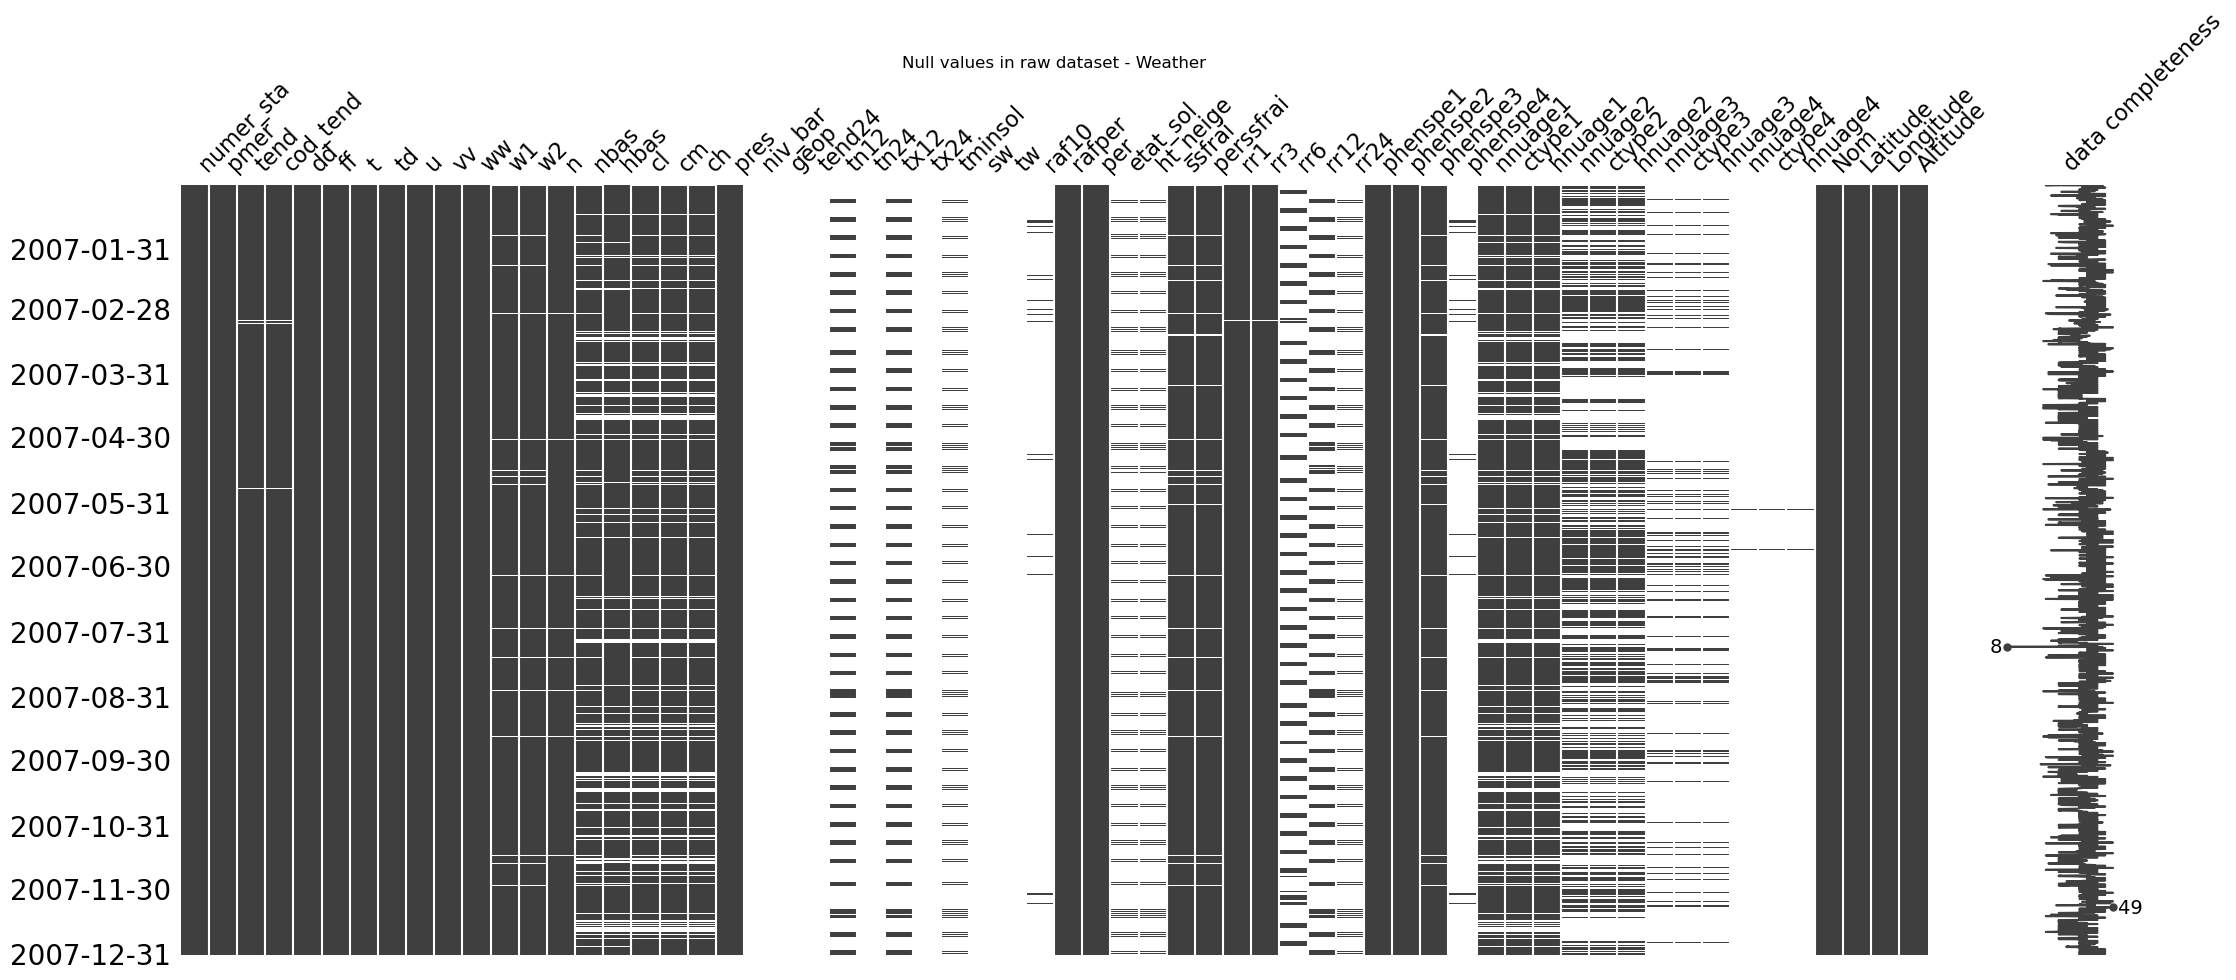

In [15]:

msno.matrix(files_map['2007'], labels= True, freq ='M')
plt.title("Null values in raw dataset - Weather")

## Removing columns with missing values

### 2007

Text(0.5, 0, 'percentage of missing values')

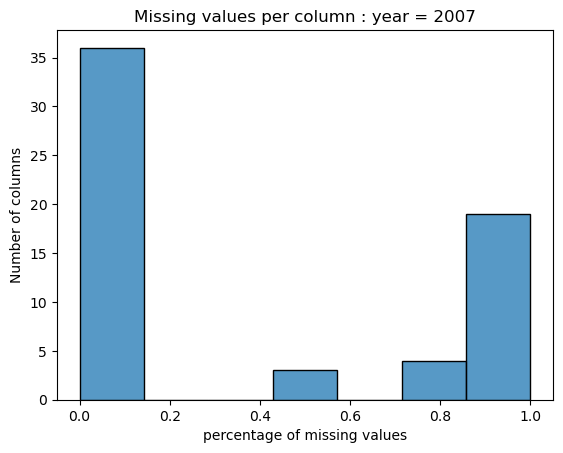

In [16]:
year = "2007"
nan_pct = files_map[year].isna()\
    .sum()\
    /len(files_map[year])
nan_pct.sort_values()

sns.histplot(nan_pct)
plt.title(f"Missing values per column : year = {year}")
plt.ylabel("Number of columns")
plt.xlabel("percentage of missing values")

In [17]:
nan_pct[nan_pct > 0.2].sort_values()

hnuage2     0.509615
nnuage2     0.509615
ctype2      0.509615
tn12        0.750343
tx12        0.750343
rr6         0.751374
rr12        0.751717
tminsol     0.875343
rr24        0.876030
etat_sol    0.877747
ht_neige    0.877747
nnuage3     0.890453
ctype3      0.890453
hnuage3     0.890453
raf10       0.976648
phenspe4    0.976992
nnuage4     0.997253
hnuage4     0.997253
ctype4      0.997253
tw          1.000000
sw          1.000000
tx24        1.000000
tn24        1.000000
tend24      1.000000
geop        1.000000
niv_bar     1.000000
dtype: float64

In [18]:
## number of removed colums
nan_pct[nan_pct > 0.2].size

26

### 2008

Text(0.5, 0, 'percentage of missing values')

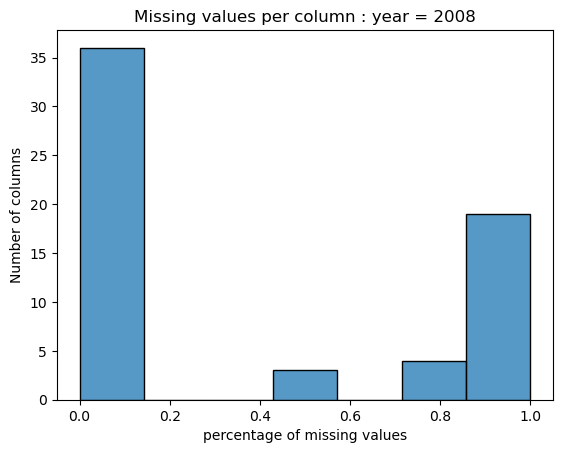

In [19]:
year = "2008"
nan_pct = files_map[year].isna()\
    .sum()\
    /len(files_map[year])
nan_pct.sort_values()

sns.histplot(nan_pct)
plt.title(f"Missing values per column : year = {year}")
plt.ylabel("Number of columns")
plt.xlabel("percentage of missing values")

In [20]:
nan_pct[nan_pct > 0.2].sort_values()

hnuage2     0.476728
nnuage2     0.476728
ctype2      0.476728
tn12        0.750513
tx12        0.750513
rr12        0.751198
rr6         0.751540
etat_sol    0.874743
ht_neige    0.874743
tminsol     0.875428
rr24        0.875770
nnuage3     0.892197
ctype3      0.892197
hnuage3     0.892197
raf10       0.979124
phenspe4    0.979808
nnuage4     0.997604
hnuage4     0.997604
ctype4      0.997604
tw          1.000000
sw          1.000000
tx24        1.000000
tn24        1.000000
tend24      1.000000
geop        1.000000
niv_bar     1.000000
dtype: float64

### 2009

Text(0.5, 0, 'percentage of missing values')

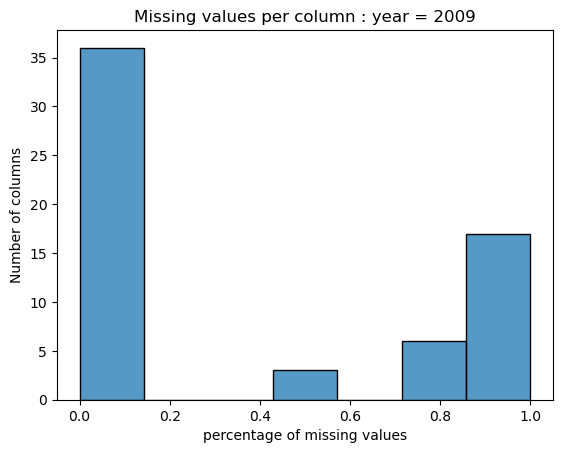

In [21]:
year = "2009"
nan_pct = files_map[year].isna()\
    .sum()\
    /len(files_map[year])
nan_pct.sort_values()

sns.histplot(nan_pct)
plt.title(f"Missing values per column : year = {year}")
plt.ylabel("Number of columns")
plt.xlabel("percentage of missing values")

In [22]:
nan_pct[nan_pct > 0.2].sort_values()

hnuage2     0.510799
nnuage2     0.510799
ctype2      0.510799
tn12        0.750086
tx12        0.750086
rr6         0.750429
rr12        0.751800
etat_sol    0.837504
ht_neige    0.845046
tminsol     0.875214
rr24        0.876928
nnuage3     0.886184
ctype3      0.886184
hnuage3     0.886184
raf10       0.980117
phenspe4    0.980802
nnuage4     0.997257
hnuage4     0.997257
ctype4      0.997257
tw          1.000000
sw          1.000000
tx24        1.000000
tn24        1.000000
tend24      1.000000
geop        1.000000
niv_bar     1.000000
dtype: float64

In [23]:
nan_pct[nan_pct > 0.2].size

26

### 2010

Text(0.5, 0, 'percentage of missing values')

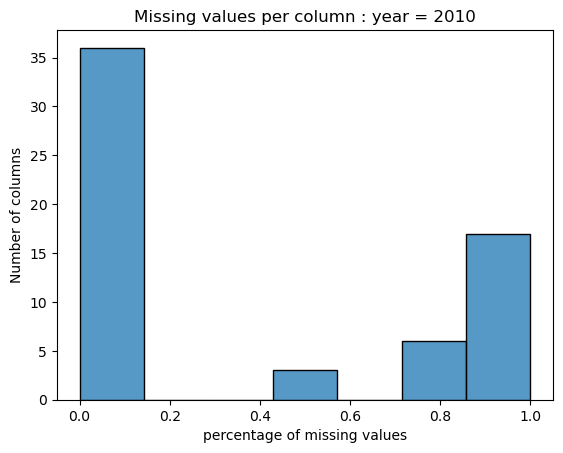

In [24]:
year = "2010"
nan_pct = files_map[year].isna()\
    .sum()\
    /len(files_map[year])
nan_pct.sort_values()

sns.histplot(nan_pct)
plt.title(f"Missing values per column : year = {year}")
plt.ylabel("Number of columns")
plt.xlabel("percentage of missing values")

In [25]:
nan_pct[nan_pct > 0.2].sort_values()

hnuage2     0.505336
nnuage2     0.505336
ctype2      0.505336
tn12        0.748709
tx12        0.748709
rr12        0.749053
rr6         0.750086
etat_sol    0.782788
ht_neige    0.802410
tminsol     0.874355
rr24        0.874699
nnuage3     0.896386
ctype3      0.896386
hnuage3     0.896386
raf10       0.982444
phenspe4    0.982444
nnuage4     0.998967
hnuage4     0.998967
ctype4      0.998967
tw          1.000000
sw          1.000000
tx24        1.000000
tn24        1.000000
tend24      1.000000
geop        1.000000
niv_bar     1.000000
dtype: float64

In [26]:
nan_pct[nan_pct > 0.2].index.union

<bound method Index.union of Index(['niv_bar', 'geop', 'tend24', 'tn12', 'tn24', 'tx12', 'tx24', 'tminsol',
       'sw', 'tw', 'raf10', 'etat_sol', 'ht_neige', 'rr6', 'rr12', 'rr24',
       'phenspe4', 'nnuage2', 'ctype2', 'hnuage2', 'nnuage3', 'ctype3',
       'hnuage3', 'nnuage4', 'ctype4', 'hnuage4'],
      dtype='object')>

### Removing union of sparse columns

In [27]:
removed_columns = None

for k,v in files_map.items():
    nan_pct = files_map[year].isna()\
        .sum()\
        /len(files_map[year])
    
    if removed_columns is None:
        removed_columns = nan_pct[nan_pct > 0.2].index

    else:
        removed_columns = removed_columns.union(nan_pct[nan_pct > 0.2].index)

In [28]:
len(removed_columns), removed_columns

(26,
 Index(['niv_bar', 'geop', 'tend24', 'tn12', 'tn24', 'tx12', 'tx24', 'tminsol',
        'sw', 'tw', 'raf10', 'etat_sol', 'ht_neige', 'rr6', 'rr12', 'rr24',
        'phenspe4', 'nnuage2', 'ctype2', 'hnuage2', 'nnuage3', 'ctype3',
        'hnuage3', 'nnuage4', 'ctype4', 'hnuage4'],
       dtype='object'))

In [29]:
for k, v in files_map.items(): 
    if len(removed_columns.intersection(v.columns)) != 0:
        files_map[k] = v.drop(columns = removed_columns)

Text(0.5, 1.0, 'Null values after removing sparse columns')

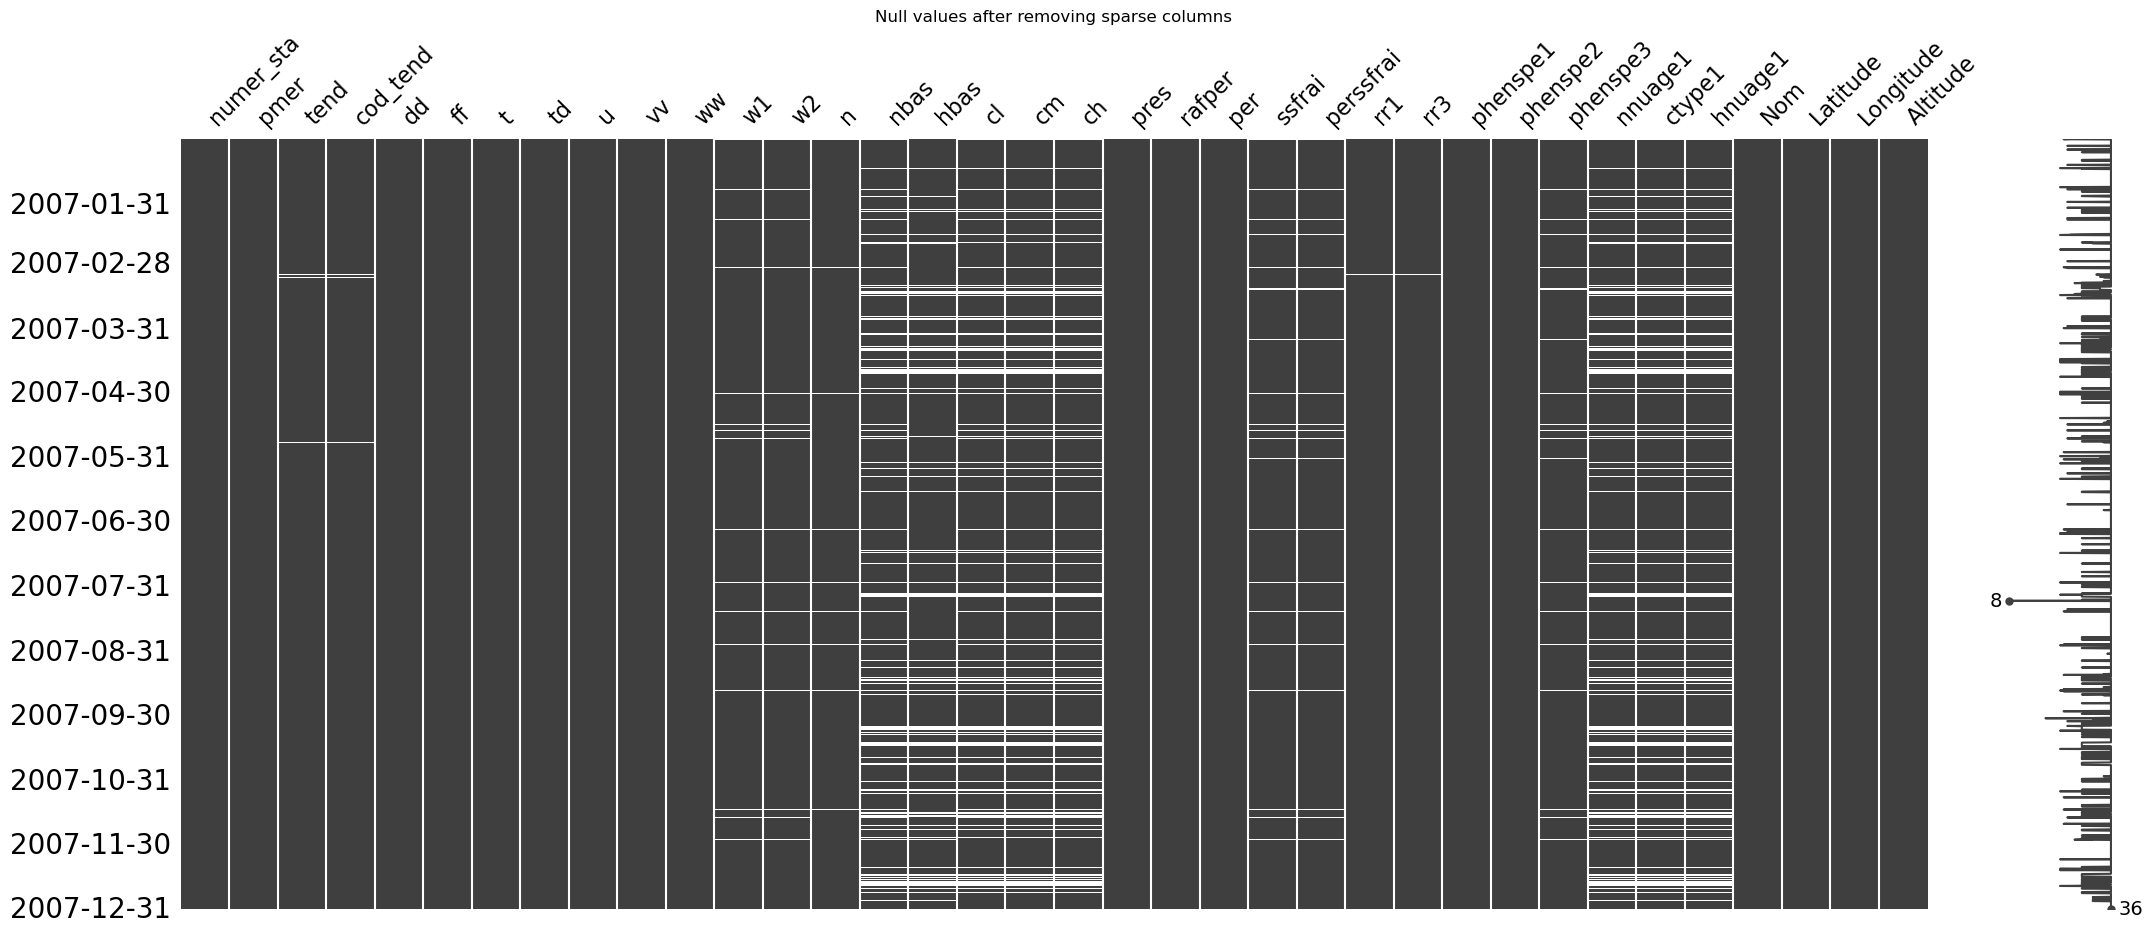

In [30]:
msno.matrix(files_map['2007'], freq="M")
plt.title("Null values after removing sparse columns")

### Converting data types to float

In [31]:
for k, v in files_map.items():
    temp_df = v

    for column in temp_df.columns:
        if not column in ['numer_sta', 'Nom']:
            temp_df[column]= temp_df[column].astype(float)

    files_map[k] = temp_df

### Linear Interpolation with missing values 

In [32]:
for k, v in files_map.items():
    files_map[k] = v.interpolate(method='linear')

Text(0.5, 1.0, 'Null Values after interpolation')

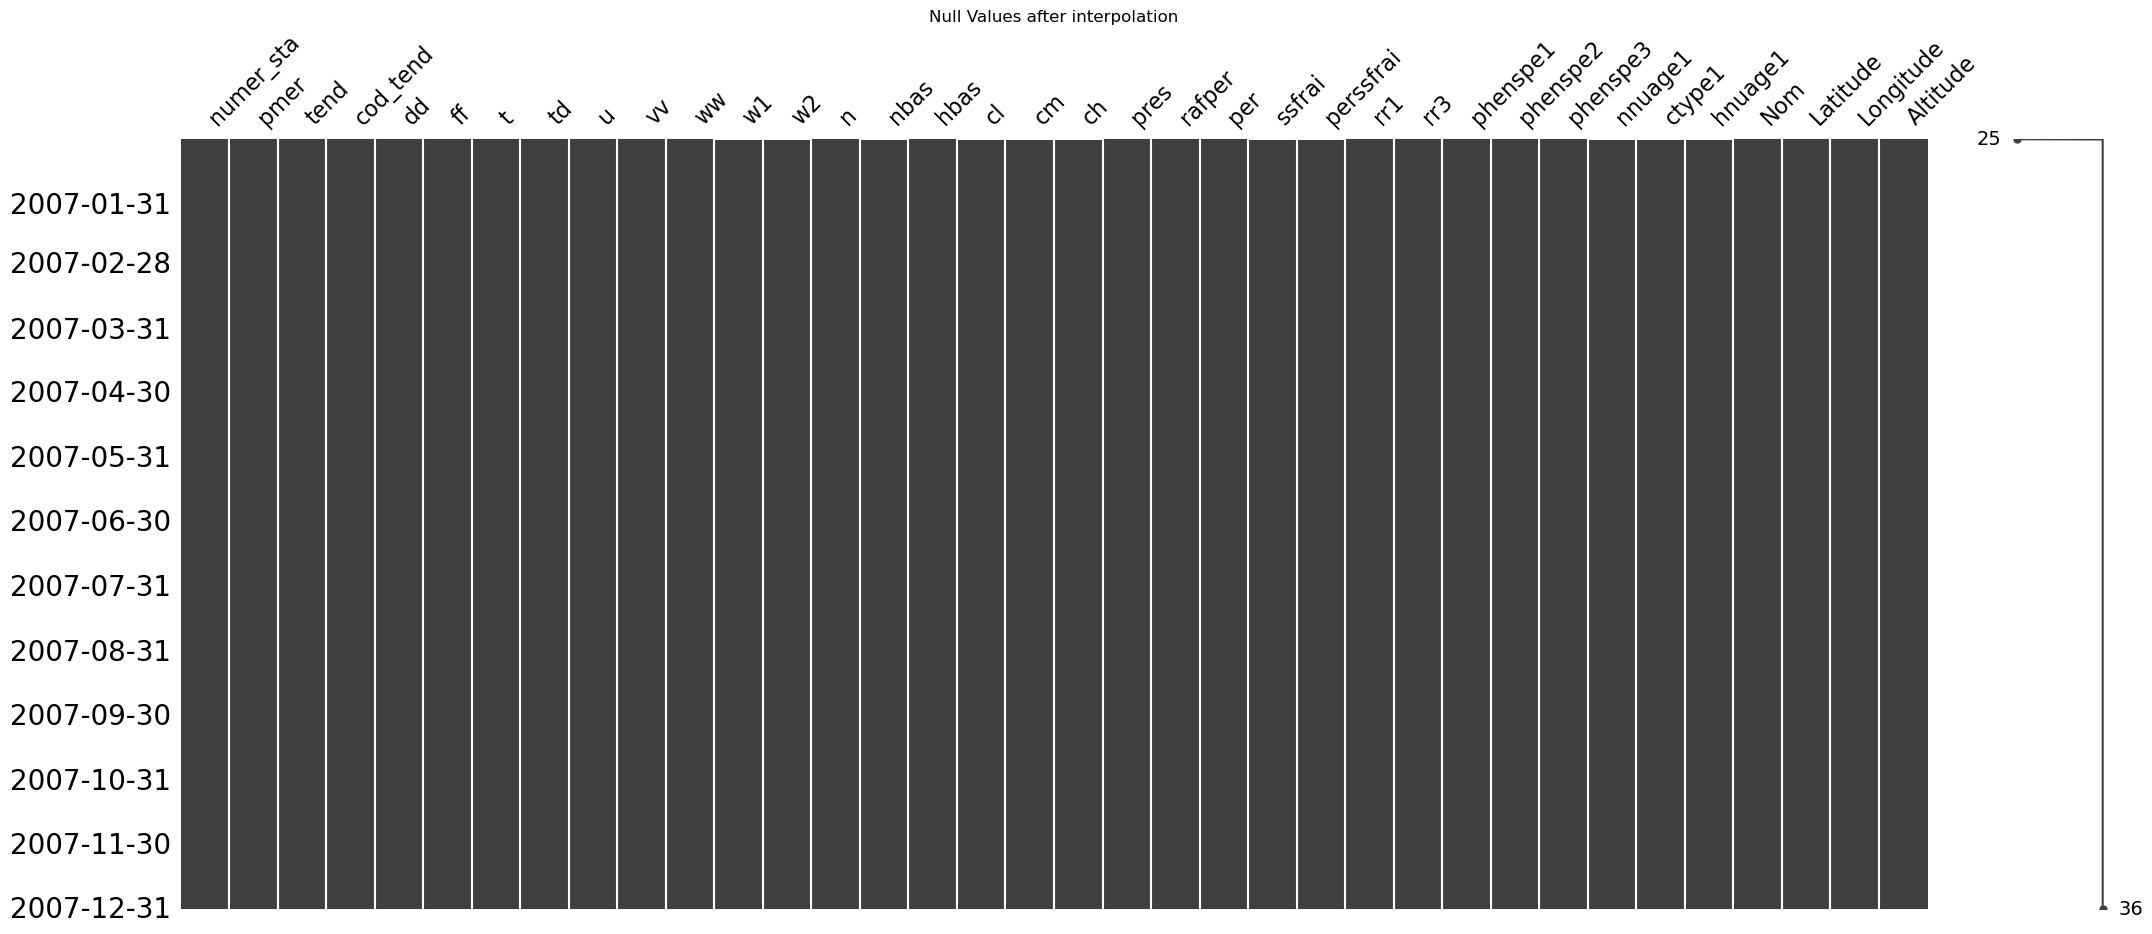

In [33]:
msno.matrix(files_map['2007'].sort_index(), freq='M')
plt.title("Null Values after interpolation")

## Joining all years in one

In [43]:
cleaned_weather_df = pd.concat(files_map.values())
cleaned_weather_df.head()

,numer_sta,pmer,tend,cod_tend,dd,ff,t,td,u,vv,...,phenspe1,phenspe2,phenspe3,nnuage1,ctype1,hnuage1,Nom,Latitude,Longitude,Altitude
date,,,,,,,,,,,,,,,,,,,,,
2007-01-01 00:00:00,7149,101960.0,-70.0,6.0,220.0,9.8,286.65,284.85,89.0,20000.0,...,1017.0,710.0,1118.0,NaN,NaN,NaN,ORLY,48.716833,2.384333,89.0
2007-01-01 03:00:00,7149,102010.0,40.0,3.0,240.0,7.2,285.65,282.25,80.0,20000.0,...,710.0,1114.0,1116.5,NaN,NaN,NaN,ORLY,48.716833,2.384333,89.0
2007-01-01 06:00:00,7149,102040.0,30.0,3.0,230.0,8.7,283.65,279.75,77.0,20000.0,...,1015.0,710.0,1115.0,2.0,8.0,780.0,ORLY,48.716833,2.384333,89.0
2007-01-01 09:00:00,7149,102240.0,190.0,3.0,250.0,9.8,282.05,278.05,76.0,17000.0,...,1018.0,710.0,1118.0,2.0,8.0,450.0,ORLY,48.716833,2.384333,89.0
2007-01-01 12:00:00,7149,102450.0,210.0,0.0,270.0,8.7,283.65,276.65,62.0,25000.0,...,710.0,1114.0,3100.0,1.0,8.0,840.0,ORLY,48.716833,2.384333,89.0


In [48]:
## interpolation errors in the first rows
cleaned_weather_df.fillna(method = 'bfill')\
    .rename_axis(index = 'date')\
    .to_pickle(
        os.path.join("data", "weather", "cleaned_weather.pkl")
    )

In [52]:
cleaned_weather_df.loc['2010-12-11']

,numer_sta,pmer,tend,cod_tend,dd,ff,t,td,u,vv,...,phenspe1,phenspe2,phenspe3,nnuage1,ctype1,hnuage1,Nom,Latitude,Longitude,Altitude
date,,,,,,,,,,,,,,,,,,,,,
2010-12-11 00:00:00,7149,103140.0,-130.0,8.0,260.0,3.1,276.75,274.95,88.0,18000.0,...,710.0,1104.0,3100.0,7.0,6.0,720.0,ORLY,48.716833,2.384333,89.0
2010-12-11 03:00:00,7149,103020.0,-120.0,6.0,240.0,3.1,277.55,275.45,86.0,18000.0,...,710.0,1105.0,3100.0,7.0,6.0,660.0,ORLY,48.716833,2.384333,89.0
2010-12-11 06:00:00,7149,102910.0,-110.0,6.0,230.0,2.6,277.75,275.75,87.0,16000.0,...,710.0,1104.0,3100.0,7.0,6.0,570.0,ORLY,48.716833,2.384333,89.0
2010-12-11 09:00:00,7149,102840.0,-70.0,8.0,250.0,2.6,278.05,276.35,89.0,18000.0,...,710.0,1104.0,3100.0,7.0,6.0,510.0,ORLY,48.716833,2.384333,89.0
2010-12-11 12:00:00,7149,102760.0,-70.0,8.0,250.0,2.6,278.85,277.05,88.0,18000.0,...,710.0,1105.0,3100.0,8.0,6.0,510.0,ORLY,48.716833,2.384333,89.0
2010-12-11 15:00:00,7149,102590.0,-170.0,6.0,280.0,1.5,279.05,277.05,87.0,15000.0,...,710.0,1103.0,3100.0,8.0,6.0,450.0,ORLY,48.716833,2.384333,89.0
2010-12-11 18:00:00,7149,102510.0,-80.0,8.0,300.0,1.5,278.95,276.65,85.0,14000.0,...,710.0,1105.0,3100.0,8.0,6.0,420.0,ORLY,48.716833,2.384333,89.0
2010-12-11 21:00:00,7149,102370.0,-140.0,8.0,250.0,1.5,278.05,277.35,95.0,3000.0,...,710.0,1103.0,3100.0,1.0,7.0,180.0,ORLY,48.716833,2.384333,89.0
